In [5]:
import pandas as pd

In [6]:
#sama+gasta
data=pd.read_excel(r'C:\Users\admin\Desktop\inflation\inflation_cpi_ord.xlsx')

In [7]:
print(len(data))


55


In [8]:
data.columns

Index(['Date', 'inflation', 'FOOD AND BEVERAGES', 'TOBACCO',
       'CLOTHING  AND FOOTWEAR',
       'HOUSING, WATER, ELECTRICITY, GAS AND OTHER FUELS',
       'FURNISHINGS, HOUSEHOLD EQUIPMENT', 'HEALTH', 'TRANSPORT',
       'COMMUNICATION', 'RECREATION AND CULTURE', 'EDUCATION',
       'RESTAURANTS AND HOTELS', 'MISCELLANEOUS GOODS AND SERVICES', 'GI',
       'pc_change'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 16 columns):
 #   Column                                            Non-Null Count  Dtype         
---  ------                                            --------------  -----         
 0   Date                                              55 non-null     datetime64[ns]
 1   inflation                                         55 non-null     float64       
 2   FOOD AND BEVERAGES                                55 non-null     float64       
 3   TOBACCO                                           55 non-null     float64       
 4   CLOTHING  AND FOOTWEAR                            55 non-null     float64       
 5   HOUSING, WATER, ELECTRICITY, GAS AND OTHER FUELS  55 non-null     float64       
 6   FURNISHINGS, HOUSEHOLD EQUIPMENT                  55 non-null     float64       
 7   HEALTH                                            55 non-null     float64       
 8   TRANSPORT                       

In [10]:
# data['Date']=data['ear'].dt.strftime('%m/%Y')

Text(0, 0.5, 'inflation')

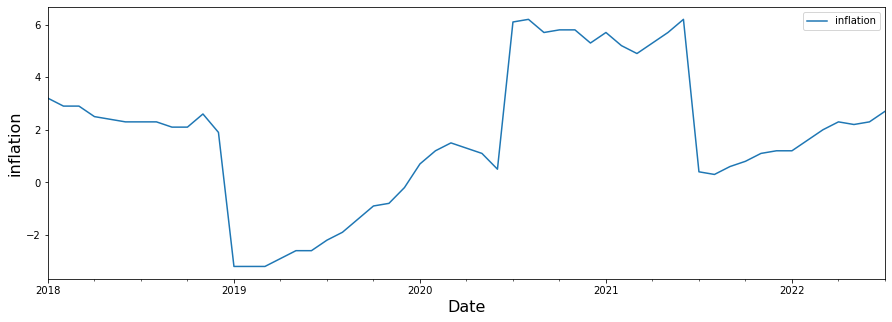

In [11]:
import matplotlib.pyplot as plt
data.sort_values(by='Date').plot(x='Date', y='inflation',figsize=(15,5))
plt.xlabel("Date",size=16)
plt.ylabel("inflation",size=16)

C:\Users\admin\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\admin\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


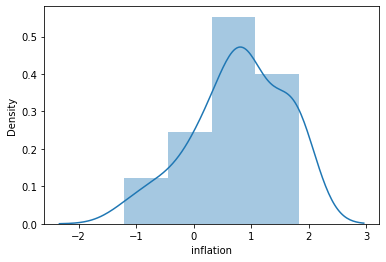

In [12]:
# Distplot of log transformed SalePrice
import seaborn as sns
import numpy as np
sns.distplot(np.log(data['inflation']))
plt.show()

In [13]:
#data['_log_trans']= np.log(data['inflation'])


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import sweetviz as sv
import warnings
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [15]:
data.index = pd.to_datetime(data.Date,format='%y/%m/%d', infer_datetime_format=True)

In [16]:
data.columns

Index(['Date', 'inflation', 'FOOD AND BEVERAGES', 'TOBACCO',
       'CLOTHING  AND FOOTWEAR',
       'HOUSING, WATER, ELECTRICITY, GAS AND OTHER FUELS',
       'FURNISHINGS, HOUSEHOLD EQUIPMENT', 'HEALTH', 'TRANSPORT',
       'COMMUNICATION', 'RECREATION AND CULTURE', 'EDUCATION',
       'RESTAURANTS AND HOTELS', 'MISCELLANEOUS GOODS AND SERVICES', 'GI',
       'pc_change'],
      dtype='object')

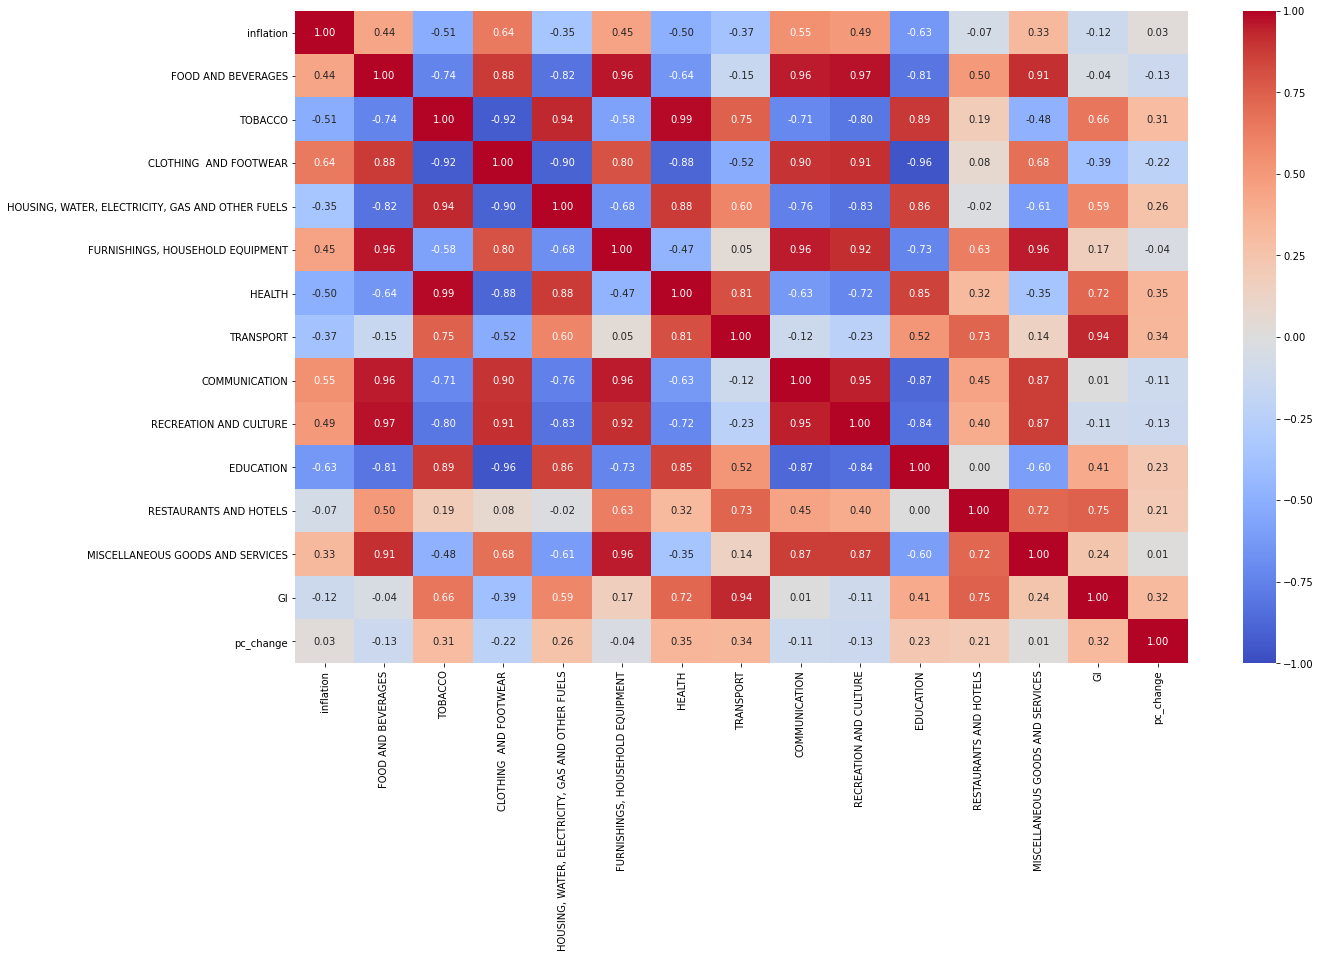

In [17]:
plt.figure(figsize = (20, 12))
sns.heatmap(data.corr(), annot= True, cmap= 'coolwarm', fmt= '.2f', vmin= -1, vmax= 1)
plt.show()

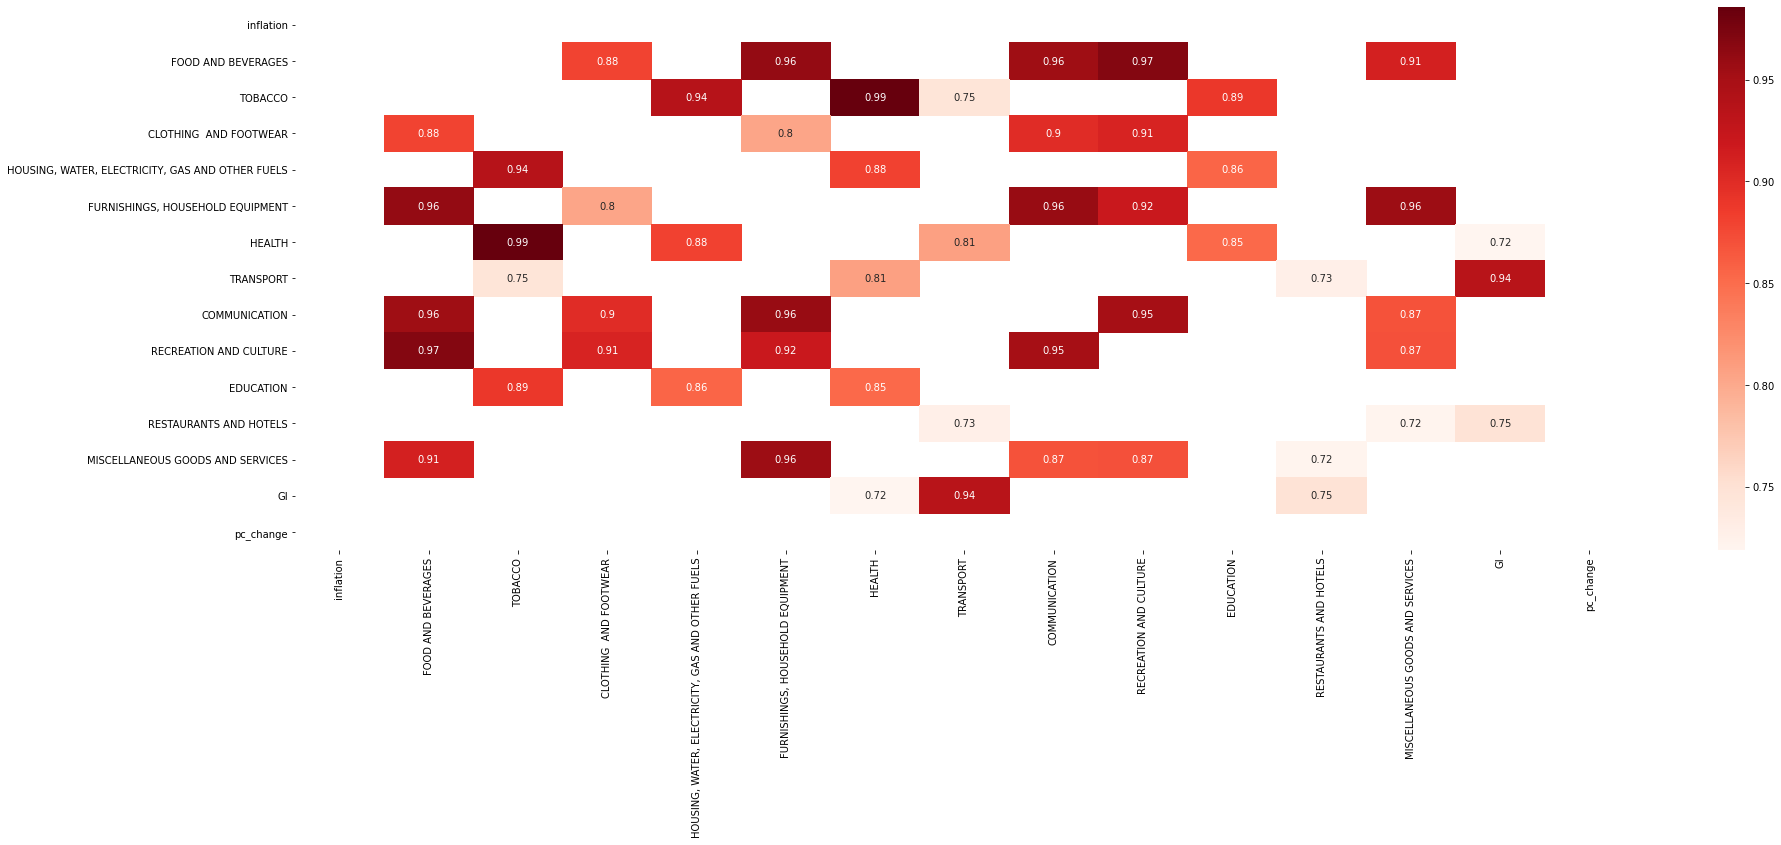

In [18]:
#correlation values more than 0.7  
dfCorr = data.corr()
filteredDf = dfCorr[((dfCorr >= .7) & (dfCorr != 1)) ]
plt.figure(figsize=(30,10))
sns.heatmap(filteredDf, annot=True, cmap="Reds")
plt.show()

In [19]:
df1=data[['inflation', 'FOOD AND BEVERAGES', 'TOBACCO',
       'CLOTHING  AND FOOTWEAR',
       'HOUSING, WATER, ELECTRICITY, GAS AND OTHER FUELS',
       'FURNISHINGS, HOUSEHOLD EQUIPMENT', 'HEALTH', 'TRANSPORT',
       'COMMUNICATION', 'RECREATION AND CULTURE', 'EDUCATION',
       'RESTAURANTS AND HOTELS', 'MISCELLANEOUS GOODS AND SERVICES', 'GI',
       'pc_change']]

In [20]:
#correlated Columns
df=[]
for i in df1.columns: 
    #print(i)
    for  ind, column in enumerate(df1.columns):
      #print(ind, column)
      #print(data1.columns[ind+1])
      #print(data1.columns[ind])
      #data1[i]=data1[i].astype(float)
      #data1.columns[ind+1]=data1.columns[ind+1].astype(float)
      corr_= df1[i].corr(df1[column])
      #print(corr_)
      if (abs(corr_) > 0.7) & (abs(corr_)<0.9):
            print(corr_)
            print (i)
            print( column)
            df.append(i)
            print('*****')


-0.7376775694583738
FOOD AND BEVERAGES
TOBACCO
*****
0.8804016826104583
FOOD AND BEVERAGES
CLOTHING  AND FOOTWEAR
*****
-0.8163232853853836
FOOD AND BEVERAGES
HOUSING, WATER, ELECTRICITY, GAS AND OTHER FUELS
*****
-0.8079156132279718
FOOD AND BEVERAGES
EDUCATION
*****
-0.7376775694583739
TOBACCO
FOOD AND BEVERAGES
*****
0.7454186133381332
TOBACCO
TRANSPORT
*****
-0.7128329895623852
TOBACCO
COMMUNICATION
*****
-0.8013424860965667
TOBACCO
RECREATION AND CULTURE
*****
0.8897458685676021
TOBACCO
EDUCATION
*****
0.8804016826104583
CLOTHING  AND FOOTWEAR
FOOD AND BEVERAGES
*****
-0.8959172659710266
CLOTHING  AND FOOTWEAR
HOUSING, WATER, ELECTRICITY, GAS AND OTHER FUELS
*****
0.8036688483248976
CLOTHING  AND FOOTWEAR
FURNISHINGS, HOUSEHOLD EQUIPMENT
*****
-0.8777581966061898
CLOTHING  AND FOOTWEAR
HEALTH
*****
-0.8163232853853835
HOUSING, WATER, ELECTRICITY, GAS AND OTHER FUELS
FOOD AND BEVERAGES
*****
-0.8959172659710264
HOUSING, WATER, ELECTRICITY, GAS AND OTHER FUELS
CLOTHING  AND FOOTWEAR

In [21]:
len(np.unique(df))

13

In [22]:
data.columns

Index(['Date', 'inflation', 'FOOD AND BEVERAGES', 'TOBACCO',
       'CLOTHING  AND FOOTWEAR',
       'HOUSING, WATER, ELECTRICITY, GAS AND OTHER FUELS',
       'FURNISHINGS, HOUSEHOLD EQUIPMENT', 'HEALTH', 'TRANSPORT',
       'COMMUNICATION', 'RECREATION AND CULTURE', 'EDUCATION',
       'RESTAURANTS AND HOTELS', 'MISCELLANEOUS GOODS AND SERVICES', 'GI',
       'pc_change'],
      dtype='object')

In [24]:
# data

In [25]:
df1.columns

Index(['inflation', 'FOOD AND BEVERAGES', 'TOBACCO', 'CLOTHING  AND FOOTWEAR',
       'HOUSING, WATER, ELECTRICITY, GAS AND OTHER FUELS',
       'FURNISHINGS, HOUSEHOLD EQUIPMENT', 'HEALTH', 'TRANSPORT',
       'COMMUNICATION', 'RECREATION AND CULTURE', 'EDUCATION',
       'RESTAURANTS AND HOTELS', 'MISCELLANEOUS GOODS AND SERVICES', 'GI',
       'pc_change'],
      dtype='object')

In [26]:
# df1= df1.reset_index()
# df1=df1.drop(['Date'],axis=1)
x1=data[['inflation', 'FOOD AND BEVERAGES', 'TOBACCO',
       'CLOTHING  AND FOOTWEAR',
       'HOUSING, WATER, ELECTRICITY, GAS AND OTHER FUELS',
       'FURNISHINGS, HOUSEHOLD EQUIPMENT', 'HEALTH', 'TRANSPORT',
       'COMMUNICATION', 'RECREATION AND CULTURE', 'EDUCATION',
       'RESTAURANTS AND HOTELS', 'MISCELLANEOUS GOODS AND SERVICES', 'GI',
       'pc_change']]

In [27]:
from sklearn.decomposition import PCA
threshold = 6
high_score_features = []
pca = PCA(n_components=5) #you can change the number of features
fit = pca.fit(x1)

print(fit.explained_variance_ratio_)

for score, f_name in sorted(zip(fit.explained_variance_ratio_, x1.columns), reverse=True)[:threshold]:
        print(f_name, score)
        high_score_features.append(f_name)

[0.94391825 0.04194387 0.00738662 0.0032885  0.00187911]
inflation 0.9439182496872055
FOOD AND BEVERAGES 0.04194386859615597
TOBACCO 0.007386617763566613
CLOTHING  AND FOOTWEAR 0.003288498004683384
HOUSING, WATER, ELECTRICITY, GAS AND OTHER FUELS 0.0018791117160678477


In [28]:
data.columns

Index(['Date', 'inflation', 'FOOD AND BEVERAGES', 'TOBACCO',
       'CLOTHING  AND FOOTWEAR',
       'HOUSING, WATER, ELECTRICITY, GAS AND OTHER FUELS',
       'FURNISHINGS, HOUSEHOLD EQUIPMENT', 'HEALTH', 'TRANSPORT',
       'COMMUNICATION', 'RECREATION AND CULTURE', 'EDUCATION',
       'RESTAURANTS AND HOTELS', 'MISCELLANEOUS GOODS AND SERVICES', 'GI',
       'pc_change'],
      dtype='object')

In [29]:
# Train-Test Split
y= data['inflation'].values
#X= data[['FOOD AND BEVERAGES','TOBACCO','CLOTHING  AND FOOTWEAR','HOUSING, WATER, ELECTRICITY, GAS AND OTHER FUELS']]
X=data.drop(['inflation','Date'], axis= 1)

X_train, X_test, y_train, y_test= train_test_split(X, y, train_size= .7, random_state= 42)

In [30]:
# Selecting few values for alpha
range1= [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
range2= list(range(2, 1001))
range1.extend(range2)
params_grid= {'alpha': range1}

In [31]:
params_grid= {'alpha': range1}
lasso= Lasso(random_state= 42)
lasso_gcv= GridSearchCV(estimator= lasso, 
                        param_grid= params_grid,
                        cv= 3,
                        scoring= 'neg_mean_absolute_error',
                        return_train_score= True,
                        n_jobs= -1,
                        verbose= 1)

lasso_gcv.fit(X_train, y_train) 


Fitting 3 folds for each of 1013 candidates, totalling 3039 fits


GridSearchCV(cv=3, estimator=Lasso(random_state=42), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2, 3, 4,
                                   5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,
                                   17, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [31]:
#lasso.summary()

In [32]:
lasso_gcv.best_estimator_

Lasso(alpha=0.1, random_state=42)

In [33]:
lasso_gcv.best_score_

-1.2948385593733376

In [34]:
# Fitting model using best_estimator_
lasso_model= lasso_gcv.best_estimator_
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.1, random_state=42)

In [35]:
# Evaluating on training dataset
y_train_pred= lasso_model.predict(X_train)
print( 'r2 score on training dataset:', r2_score(y_train, y_train_pred))
print( 'MSE on training dataset:', mean_squared_error(y_train, y_train_pred))
print( 'RMSE on training dataset:', (mean_squared_error(y_train, y_train_pred)**.5))
print( 'MAE on training dataset:', mean_absolute_error(y_train, y_train_pred))

r2 score on training dataset: 0.7597640453584098
MSE on training dataset: 1.399871877272289
RMSE on training dataset: 1.1831618136469284
MAE on training dataset: 0.9788121577010029


In [36]:
# r2 score on training dataset: 0.6391458456166214
# MSE on training dataset: 2.102722647289833
# RMSE on training dataset: 1.450076772895088
# MAE on training dataset: 1.1559851337049312

In [36]:
# Evaluating on testing dataset
y_test_pred= lasso_model.predict(X_test)
print( 'r2 score on testing dataset:', r2_score(y_test, y_test_pred))
print( 'MSE on testing dataset:', mean_squared_error(y_test, y_test_pred))
print( 'RMSE on testing dataset:', (mean_squared_error(y_test, y_test_pred)**.5))
print( 'MAE on testing dataset:', mean_absolute_error(y_test, y_test_pred))

r2 score on testing dataset: 0.7449887063248131
MSE on testing dataset: 2.581173135843103
RMSE on testing dataset: 1.6066029801550548
MAE on testing dataset: 1.190898325120792


In [37]:
lasso_model.score(X_test, y_test), lasso_model.score(X_train, y_train)

(0.7449887063248131, 0.7597640453584098)

In [38]:
# r2 score on testing dataset: 0.7213016267910084
# MSE on testing dataset: 2.8209290010759243
# RMSE on testing dataset: 1.6795621456427041
# MAE on testing dataset: 1.3354723567891829

In [39]:
forecast = pd.DataFrame(y_test_pred,index = y_test,columns=['Prediction'])

In [41]:
forecast1 = forecast.rename_axis('Actual')

In [42]:
forecast1

,Prediction
Actual,
6.2,4.720530
2.3,2.320277
5.7,5.387531
-3.2,-0.510128
-1.9,-1.077216
1.6,1.831721
6.2,2.451405
1.5,-0.241010
0.3,2.437391


In [47]:
# fig = plt.figure()
# fig.suptitle('Inflation rate')
 
# actual, = plt.plot(X_test.index, y_test, 'go-', label='Actual Closing Price')
# predicted, = plt.plot(X_test.index, y_test_pred, 'ro-', label='Predicted Closing Price')
 
# plt.xlabel('Date')
# plt.ylabel('Inflation rate')
 
# plt.legend(handles=[predicted, actual])
 
#plt.show()

In [142]:
from sklearn import datasets
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
lasso_cv = LassoCV(cv=5)
#
# Fit the Lasso model
#
lasso_cv.fit(X, y)
#
# Create the model score
#
lasso_cv.score(X, y)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.18350198899005932, tolerance: 0.03857588636363637
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2223048500339786, tolerance: 0.03857588636363637
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.23064764553487294, tolerance: 0.03857588636363637
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent

0.6703739874732898

##################################################

In [4]:
# x=pd.read_excel(r'C:\Users\admin\Desktop\worldbank.xlsx')

In [3]:
# scaler = MinMaxScaler(feature_range=(0, 1))
# dataset = scaler.fit_transform(x)

In [2]:
# dataset[0:-1]

In [1]:
# # Train-Test Split
# y= data['Saudi Arabia'].values
# #X= data[['FOOD AND BEVERAGES','TOBACCO','CLOTHING  AND FOOTWEAR','HOUSING, WATER, ELECTRICITY, GAS AND OTHER FUELS']]
# X=data.drop(['Saudi Arabia'], axis= 1)
# dataset = scaler.fit_transform(X)
# dataset1 = scaler.fit_transform(y)

# X_train, X_test, y_train, y_test= train_test_split(dataset, dataset1, train_size= .7, random_state= 42)

In [173]:
# dataset[::1]